<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_3/Lab_03_Exploration_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploration B**
The file world_population.csv (available at https://tinyurl.com/ChrisCoDV/world_population.csv) contains data
about population densities from 1960 to 2016. Note this is population density (i.e. the number of people per square
kilometer) and not absolute population. So some of the smallest countries have the highest densities.

---



---



---



#**1. The data in this exploration also involves more work to get it into shape so read in the data and wrangle it as follows (slightly different to last week):**
First, the country name is a bit inconvenient to use to select specific countries so instead we will use the
country code. However, that means we need to use column 1 as the index column and not column 0.
Next, each column contains the data from a particular year, whilst each row contains the data for a country.
We would like it the other way around to match the previous examples, so transpose it. [Hint: you should
have done this last week.]

---



---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://tinyurl.com/ChrisCoDV/world_population.csv", index_col=1) #index_column can be 1 2 3 4 5 0 etc, it is that column who you want to be the indexxxxx!!!!
#Since we are going to use the "Country Code" our index column becomes 1
data = data.transpose()
data.head(4)

Country Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Indicator Name,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...
Indicator Code,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,...,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Next, drop the initial rows which contain descriptive data – the rows you need to drop are 'Country Name', 'Indicator Name' and 'Indicator Code'. [Hint: you should have done this last week except dropping Country Code rather than Country Name.]**

###**You should also drop the rows '1960' and '2016' (you can do this at the same time as the other rows) which contain no data. [Note: if you do not do this the numpy.polyfit() function will not work in Jupyter Lab, although it does seem to work in PyCharm.]**

---



---



In [2]:
selected = ["Country Name", "Indicator Name", "Indicator Code", "1960", "2016"]
data = data.drop(selected, axis=0) #“axis 0” represents rows and “axis 1” represents columns.
data.head(5)

Country Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
1961,307.972222,30.587234,14.038148,4.305195,60.576642,6.978698,1.207955,7.656358,67.93955,102.39,...,108.845126,5.39032,NaN,23.694862,39.618728,9.946897,14.796892,6.897825,4.227724,10.021037
1962,312.366667,32.714894,14.312061,4.384299,62.456898,7.171974,1.342584,7.778624,70.325606,105.59,...,110.980368,5.562428,NaN,24.102679,40.913781,10.112857,15.216878,7.075824,4.359305,10.356112
1963,314.983333,34.914894,14.599692,4.464433,64.329234,7.372223,1.497799,7.900729,72.723112,109.415,...,113.170912,5.739295,NaN,24.602465,42.248763,10.28373,15.609838,7.261381,4.496824,10.703901
1964,316.827778,37.170213,14.901579,4.544558,66.209307,7.579523,1.653349,8.022073,75.101264,113.505,...,115.438262,5.917227,NaN,25.106286,43.587986,10.460234,15.984431,7.456342,4.639914,11.062585
1965,318.666667,39.470213,15.218206,4.624228,68.058066,7.793882,1.798062,8.14246,77.437654,117.59,...,117.79471,6.094094,NaN,25.620065,44.900353,10.642972,16.348334,7.661877,4.788452,11.431128


#**2. Create a chart showing line plots for population densities for all countries over the period. Use the legend to work out the country codes of the top five countries and then comment out the legend.**

---



---



In [3]:
#SORT THE DATA:

In [4]:
# sort the data according to the maximum value of each row, smallest first
data = data.reindex(data.mean(axis=1).sort_values(ascending=True).index)

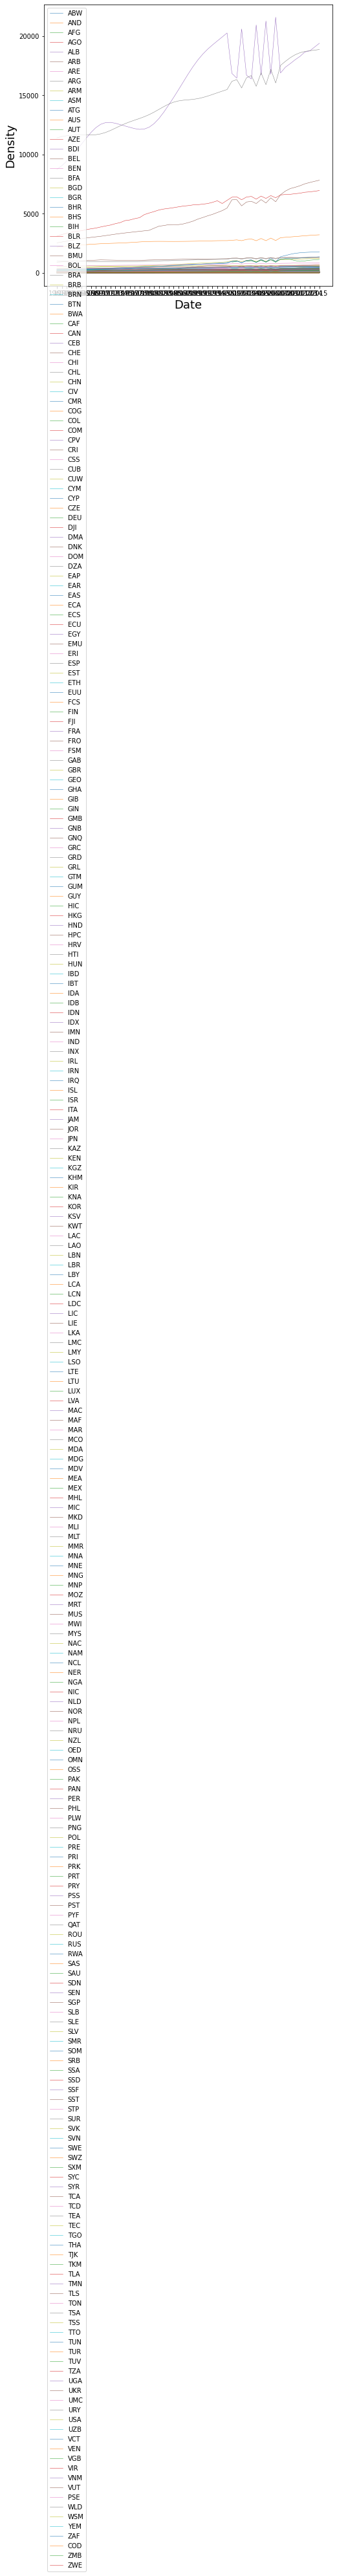

In [5]:
# data.plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.title('Population', fontsize=20)
plt.legend(data.columns, loc=2)
plt.show()

#**3. Now create a chart showing just the top five countries by population density. Make sure that the y-axis is zeroed to get a fair comparison.**

---



---



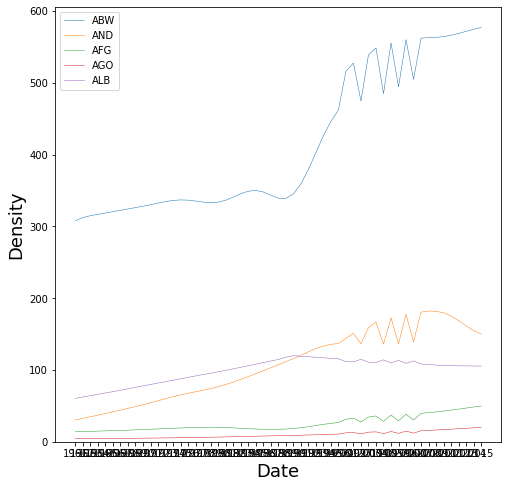

In [6]:
selected = ["ABW", "AND", "AFG", "AGO", "ALB"]

#data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)

#Setting the min value of y limit: WITHOUT THIS WE CANNOT SEE WHERE THE GRAPH ACTUALLY STARTED FROM !!
plt.ylim(ymin=0)

#Setting the x and y labels
plt.xlabel('Date', fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.title('Medium Volume Product Sales', fontsize=20)

plt.legend(selected, loc=2)
plt.show()

##**CAN YOU SEE THAT THE DATES ARE NOT READBALE? This is because Pandas does not think that its a DateTime module. So lets convert it to datetime:**

In [7]:
data.index = pd.to_datetime(data.index)

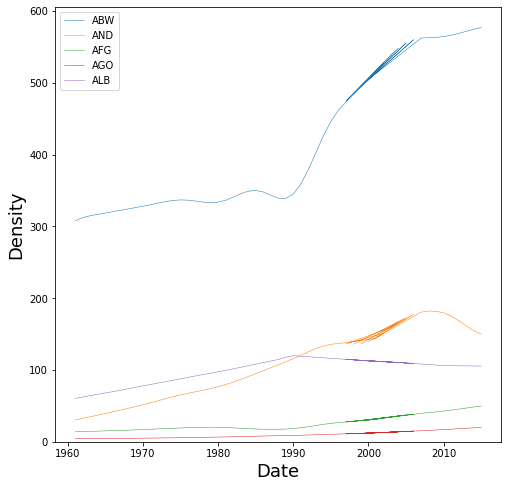

In [8]:
selected = ["ABW", "AND", "AFG", "AGO", "ALB"]

#data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)

#Setting the min value of y limit:
plt.ylim(ymin=0)

#Setting the x and y labels
plt.xlabel('Date', fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.title('Medium Volume Product Sales', fontsize=20)

plt.legend(selected, loc=2)
plt.show()

#**4. Next create the same chart but with a 10-year rolling averages included.Comment on whether you think that this chart helps the data exploration or not. [Hint: there is no right answer, you should just put your opinion.]**

---



---



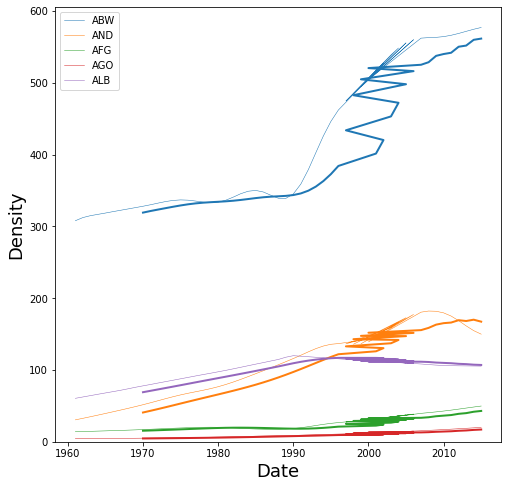

In [9]:
#___________________________________________________________________________________________________
#This bit of code plots the ROLLING AVERAGE

period = 10
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)

plt.plot(rolling_average[selected], linewidth=2)
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.title('Medium Volume Page Sales\n with 14-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()
#___________________________________________________________________________________________________


#**5. Next create the same chart but with trendlines (but not rolling averages). When you calculate the linear regression you will need the following line, rather than the one in the lecture notes and examples:**
z = np.polyfit(x, data[name].astype(np.float64), 1)
Your final chart should look something like the one on the
right.
Comment on whether you think that this chart helps the
data exploration or not. [Hint: again there is no right
answer.]

---



---



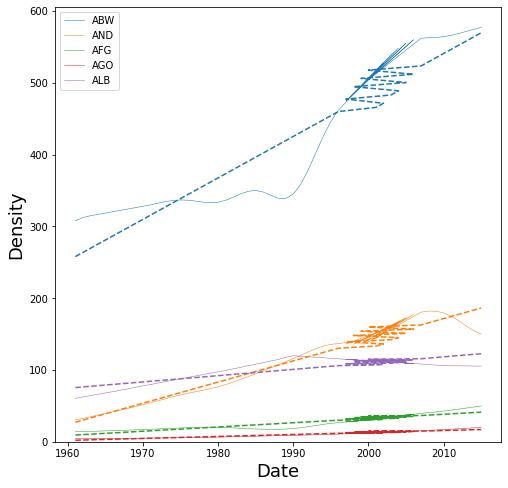

In [10]:

#___________________________________________________________________________________________________
#This bit of code plots the ROLLING AVERAGE


plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)#WE WILL STILL NEED THIS LINE FOR TRENDLINES!!!!!!!

#This bit of code is for TRENDLINES method 2:-------------------------------------------------------
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name].astype(np.float64), 1)#Changes the data type tp float
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
#---------------------------------------------------------------------------------------------------
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Density', fontsize=18)
# plt.title('Medium Volume Page Sales\n with 14-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()
#___________________________________________________________________________________________________


#**6. Finally, something dramatic happened to the population density in one of these five countries in one particular year. What year was it and can you figure out (from Google) what happened to the country that year, even if that doesn't explain the change. [Note: you do not need a code section for this item.]**

---



---



In [11]:
#DRASTIC DROP IN POPULATION OF ONE COUNTRY